# Basic Explorations on Services Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Basic Explorations on Providers Dataset

In [2]:
providers = pd.read_csv(r"C:\Users\luyil\ihealth\datasets\preproc\services\providers.csv")
providers.head()

,Unnamed: 0.1,Unnamed: 0,year,unique_providers,provider_type_cd,provider_type_desc,payer,site_of_service,resource_utilization_band,ruca_provider_class,...,insurer_paid_amt_sd,insurer_paid_amt_sum,member_paid_amt_med,member_paid_amt_mean,member_paid_amt_sd,member_paid_amt_sum,total_paid_amt_med,total_paid_amt_mean,total_paid_amt_sd,total_paid_amt_sum
0,0,0,2009.0,73.0,14-20,ORTHOPEDIC SURGERY,MEDICARE,2.0,4.0,5.0,...,401.90,89691.97,13.04,60.90,91.03,17782.95,110.73,368.06,473.75,107474.92
1,1,1,2009.0,16.0,14-18,OPHTHALMOLOGY,MINNESOTA HEALTH CARE PROGRAMS,2.0,5.0,3.0,...,543.13,33491.62,0.00,2.03,17.27,146.53,124.77,467.19,543.86,33638.15
2,2,2,2009.0,24.0,14-10,GASTROENTEROLOGY,MEDICARE,2.0,2.0,5.0,...,218.69,14503.77,0.00,23.25,37.60,1743.87,198.84,216.63,218.44,16247.64
3,3,3,2009.0,14.0,14-18,OPHTHALMOLOGY,MEDICARE,2.0,3.0,3.0,...,225.10,57168.09,49.24,67.98,62.72,12169.27,499.08,387.35,267.31,69337.36
4,4,4,2009.0,126.0,14-20,ORTHOPEDIC SURGERY,MINNESOTA HEALTH CARE PROGRAMS,2.0,5.0,1.0,...,780.47,522142.33,0.00,1.42,22.43,1575.80,140.00,473.52,782.60,523718.13


In [3]:
providers.dtypes

Unnamed: 0.1                   int64
Unnamed: 0                     int64
year                         float64
unique_providers             float64
provider_type_cd              object
provider_type_desc            object
payer                         object
site_of_service              float64
resource_utilization_band    float64
ruca_provider_class          float64
ruca_class                   float64
num_procedures               float64
unique_patients              float64
proc_per_prov_med            float64
proc_per_prov_mean           float64
proc_per_prov_sd             float64
charge_amt_med               float64
charge_amt_mean              float64
charge_amt_sd                float64
charge_amt_sum               float64
insurer_paid_amt_med         float64
insurer_paid_amt_mean        float64
insurer_paid_amt_sd          float64
insurer_paid_amt_sum         float64
member_paid_amt_med          float64
member_paid_amt_mean         float64
member_paid_amt_sd           float64
m

Our basic idea here is to first separate qualitative and quantitative data first...

In [5]:
qual_data = providers[["provider_type_cd","provider_type_desc","payer"]]
qual_data.head()

,provider_type_cd,provider_type_desc,payer
0,14-20,ORTHOPEDIC SURGERY,MEDICARE
1,14-18,OPHTHALMOLOGY,MINNESOTA HEALTH CARE PROGRAMS
2,14-10,GASTROENTEROLOGY,MEDICARE
3,14-18,OPHTHALMOLOGY,MEDICARE
4,14-20,ORTHOPEDIC SURGERY,MINNESOTA HEALTH CARE PROGRAMS


In [9]:
quant_data = providers.drop(["provider_type_cd","provider_type_desc","payer"],axis="columns")
quant_data.head()

,Unnamed: 0.1,Unnamed: 0,year,unique_providers,site_of_service,resource_utilization_band,ruca_provider_class,ruca_class,num_procedures,unique_patients,...,insurer_paid_amt_sd,insurer_paid_amt_sum,member_paid_amt_med,member_paid_amt_mean,member_paid_amt_sd,member_paid_amt_sum,total_paid_amt_med,total_paid_amt_mean,total_paid_amt_sd,total_paid_amt_sum
0,0,0,2009.0,73.0,2.0,4.0,5.0,2.0,292.0,132.0,...,401.90,89691.97,13.04,60.90,91.03,17782.95,110.73,368.06,473.75,107474.92
1,1,1,2009.0,16.0,2.0,5.0,3.0,4.0,72.0,41.0,...,543.13,33491.62,0.00,2.03,17.27,146.53,124.77,467.19,543.86,33638.15
2,2,2,2009.0,24.0,2.0,2.0,5.0,1.0,75.0,54.0,...,218.69,14503.77,0.00,23.25,37.60,1743.87,198.84,216.63,218.44,16247.64
3,3,3,2009.0,14.0,2.0,3.0,3.0,2.0,179.0,86.0,...,225.10,57168.09,49.24,67.98,62.72,12169.27,499.08,387.35,267.31,69337.36
4,4,4,2009.0,126.0,2.0,5.0,1.0,3.0,1106.0,343.0,...,780.47,522142.33,0.00,1.42,22.43,1575.80,140.00,473.52,782.60,523718.13


In [10]:
quant_data = quant_data.drop(["Unnamed: 0.1","Unnamed: 0"],axis="columns")
quant_data.head()

,year,unique_providers,site_of_service,resource_utilization_band,ruca_provider_class,ruca_class,num_procedures,unique_patients,proc_per_prov_med,proc_per_prov_mean,...,insurer_paid_amt_sd,insurer_paid_amt_sum,member_paid_amt_med,member_paid_amt_mean,member_paid_amt_sd,member_paid_amt_sum,total_paid_amt_med,total_paid_amt_mean,total_paid_amt_sd,total_paid_amt_sum
0,2009.0,73.0,2.0,4.0,5.0,2.0,292.0,132.0,2.0,4.0,...,401.90,89691.97,13.04,60.90,91.03,17782.95,110.73,368.06,473.75,107474.92
1,2009.0,16.0,2.0,5.0,3.0,4.0,72.0,41.0,3.0,4.5,...,543.13,33491.62,0.00,2.03,17.27,146.53,124.77,467.19,543.86,33638.15
2,2009.0,24.0,2.0,2.0,5.0,1.0,75.0,54.0,1.0,3.1,...,218.69,14503.77,0.00,23.25,37.60,1743.87,198.84,216.63,218.44,16247.64
3,2009.0,14.0,2.0,3.0,3.0,2.0,179.0,86.0,5.5,12.7,...,225.10,57168.09,49.24,67.98,62.72,12169.27,499.08,387.35,267.31,69337.36
4,2009.0,126.0,2.0,5.0,1.0,3.0,1106.0,343.0,4.5,8.7,...,780.47,522142.33,0.00,1.42,22.43,1575.80,140.00,473.52,782.60,523718.13


In [11]:
quant_data.shape, qual_data.shape

((15330, 27), (15330, 3))

### Quantitative Data Explorations
#### Correlation Analysis

In [13]:
corr_mat = quant_data.corr().round(2)
corr_mat

,year,unique_providers,site_of_service,resource_utilization_band,ruca_provider_class,ruca_class,num_procedures,unique_patients,proc_per_prov_med,proc_per_prov_mean,...,insurer_paid_amt_sd,insurer_paid_amt_sum,member_paid_amt_med,member_paid_amt_mean,member_paid_amt_sd,member_paid_amt_sum,total_paid_amt_med,total_paid_amt_mean,total_paid_amt_sd,total_paid_amt_sum
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
unique_providers,NaN,1.00,-0.11,0.04,-0.09,-0.10,0.42,0.47,0.12,0.12,...,-0.03,0.39,-0.05,-0.04,-0.02,0.35,-0.03,-0.04,-0.03,0.39
site_of_service,NaN,-0.11,1.00,0.07,-0.04,-0.05,-0.07,-0.07,-0.11,-0.12,...,-0.05,-0.07,0.06,0.02,-0.04,-0.07,0.07,0.02,-0.05,-0.07
resource_utilization_band,NaN,0.04,0.07,1.00,0.03,0.01,-0.00,-0.02,0.03,0.04,...,0.12,0.02,-0.22,-0.26,-0.16,-0.02,-0.02,0.05,0.11,0.02
ruca_provider_class,NaN,-0.09,-0.04,0.03,1.00,0.08,-0.08,-0.09,-0.09,-0.10,...,-0.00,-0.11,0.03,0.01,-0.01,-0.07,-0.01,-0.01,0.00,-0.10
ruca_class,NaN,-0.10,-0.05,0.01,0.08,1.00,-0.08,-0.10,-0.05,-0.08,...,0.02,-0.11,0.07,0.07,0.05,-0.07,0.01,0.02,0.02,-0.10
num_procedures,NaN,0.42,-0.07,-0.00,-0.08,-0.08,1.00,0.89,0.50,0.47,...,-0.03,0.84,-0.04,-0.03,-0.03,0.90,-0.04,-0.04,-0.03,0.86
unique_patients,NaN,0.47,-0.07,-0.02,-0.09,-0.10,0.89,1.00,0.49,0.45,...,-0.03,0.87,-0.04,-0.02,-0.01,0.90,-0.03,-0.03,-0.03,0.89
proc_per_prov_med,NaN,0.12,-0.11,0.03,-0.09,-0.05,0.50,0.49,1.00,0.79,...,-0.02,0.50,-0.05,-0.04,-0.03,0.50,-0.06,-0.05,-0.02,0.51
proc_per_prov_mean,NaN,0.12,-0.12,0.04,-0.10,-0.08,0.47,0.45,0.79,1.00,...,-0.03,0.48,-0.07,-0.08,-0.05,0.44,-0.09,-0.08,-0.03,0.48


<Axes: >

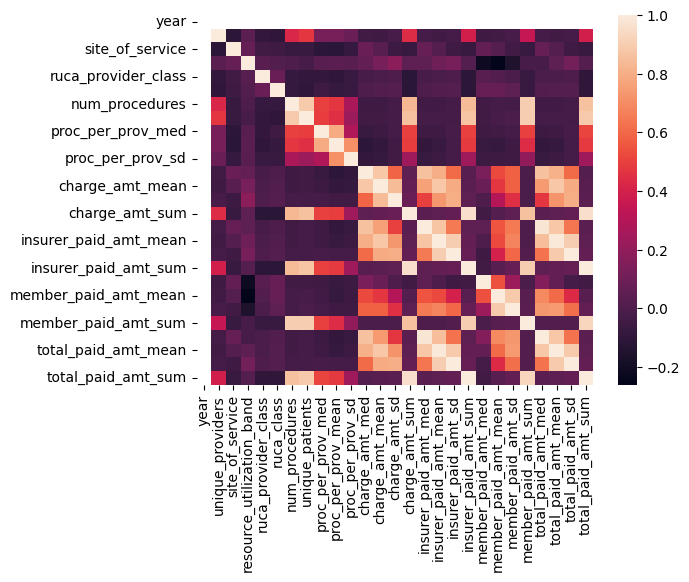

In [15]:
sns.heatmap(corr_mat,annot=False)

#### Qualititive Data Explorations

In [16]:
qual_data.head()

,provider_type_cd,provider_type_desc,payer
0,14-20,ORTHOPEDIC SURGERY,MEDICARE
1,14-18,OPHTHALMOLOGY,MINNESOTA HEALTH CARE PROGRAMS
2,14-10,GASTROENTEROLOGY,MEDICARE
3,14-18,OPHTHALMOLOGY,MEDICARE
4,14-20,ORTHOPEDIC SURGERY,MINNESOTA HEALTH CARE PROGRAMS


In [18]:
provider_types_vc = qual_data["provider_type_cd"].value_counts()

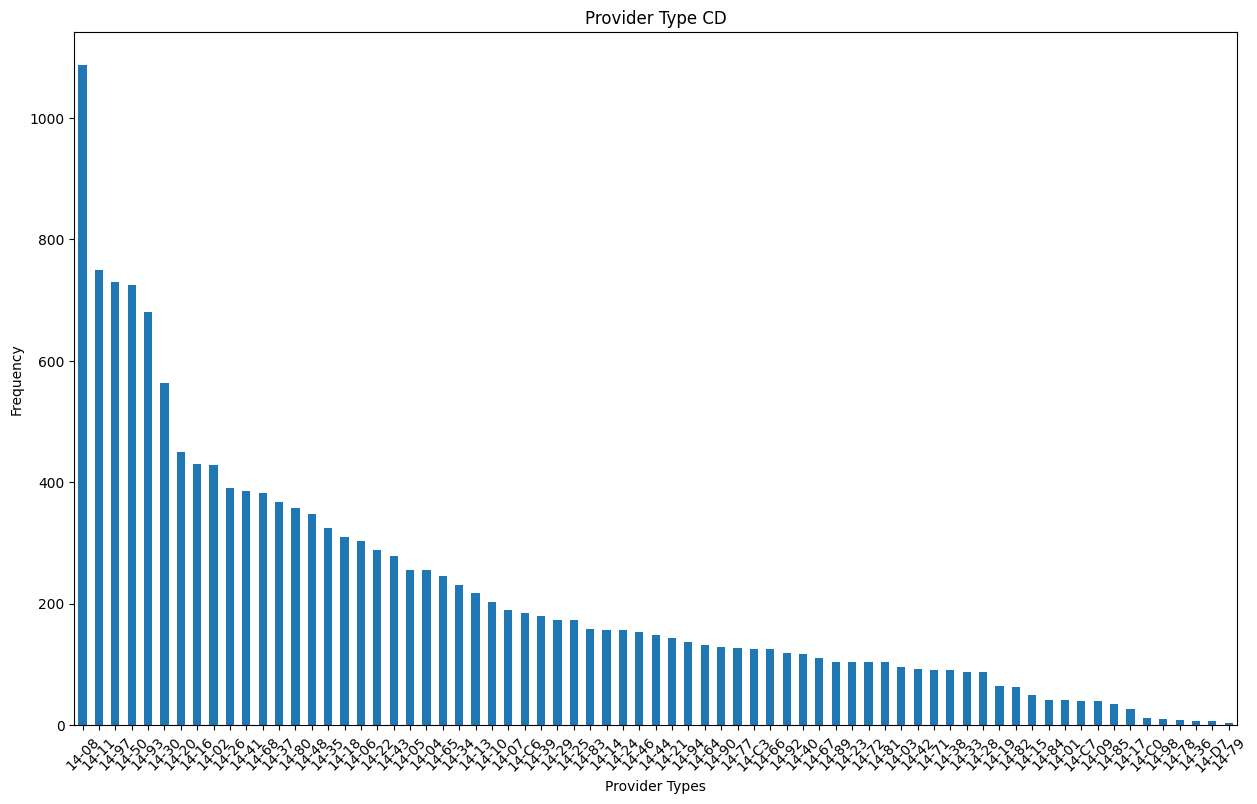

In [24]:
plt.figure(figsize=(15, 9))

provider_types_vc.plot(kind="bar")

plt.xlabel("Provider Types")
plt.ylabel("Frequency")
plt.title("Provider Type CD")
plt.xticks(rotation=45)
plt.show()

In [25]:
qual_data["provider_type_desc"].unique()

array(['ORTHOPEDIC SURGERY', 'OPHTHALMOLOGY', 'GASTROENTEROLOGY',
       'PLASTIC AND RECONSTRUCTIVE SURGERY', 'QUALIFIED AUDIOLOGIST',
       'PULMONARY DISEASE', 'INTERVENTIONAL PAIN MANAGEMENT',
       'INTERVENTIONAL CARDIOLOGY', 'SLEEP MEDICINE',
       'OBSTETRICS/GYNECOLOGY', 'PHYSICAL MEDICINE AND REHABILITATION',
       'PATHOLOGY', 'HEMATOLOGY', 'ORAL SURGERY', 'NEUROLOGY',
       'CERTIFIED CLINICAL NURSE SPECIALIST (CNS)',
       'CERTIFIED NURSE MIDWIFE (CNM)', 'PREVENTATIVE MEDICINE',
       'HAND SURGERY', 'INTERNAL MEDICINE', 'HOSPICE/PALLIATIVE CARE',
       'EMERGENCY MEDICINE',
       'CERTIFIED REGISTERED NURSE ANESTHETIST (CRNA)',
       'MAXILLOFACIAL SURGERY', 'COLORECTAL SURGERY (PROCTOLOGY)',
       'PEDIATRIC MEDICINE', 'CHIROPRACTIC', 'RHEUMATOLOGY',
       'HOSPITALIST', 'PSYCHOLOGIST, CLINICAL', 'VASCULAR SURGERY',
       'QUALIFIED SPEECH LANGUAGE PATHOLOGIST', 'CARDIAC SURGERY',
       'FAMILY MEDICINE', 'CARDIOVASCULAR DISEASE (CARDIOLOGY)',
       'OTOL

In [26]:
len(qual_data["provider_type_desc"].unique())

71

In [32]:
qual_data["provider_type_desc"].value_counts()

provider_type_desc
FAMILY MEDICINE                            1087
INTERNAL MEDICINE                           749
PHYSICIAN ASSISTANT                         729
NURSE PRACTITIONER                          725
EMERGENCY MEDICINE                          681
                                           ... 
GYNECOLOGICAL ONCOLOGY                       10
CARDIAC SURGERY                               8
NUCLEAR MEDICINE                              7
MICROGRAPHIC DERMATOLOGIC SURGERY (MDS)       6
ADDICTION MEDICINE                            3
Name: count, Length: 71, dtype: int64

In [27]:
qual_data["payer"].unique()

array(['MEDICARE', 'MINNESOTA HEALTH CARE PROGRAMS', 'COMMERCIAL'],
      dtype=object)

In [29]:
payers = qual_data["payer"].value_counts()
payers

payer
COMMERCIAL                        5982
MINNESOTA HEALTH CARE PROGRAMS    4737
MEDICARE                          4611
Name: count, dtype: int64

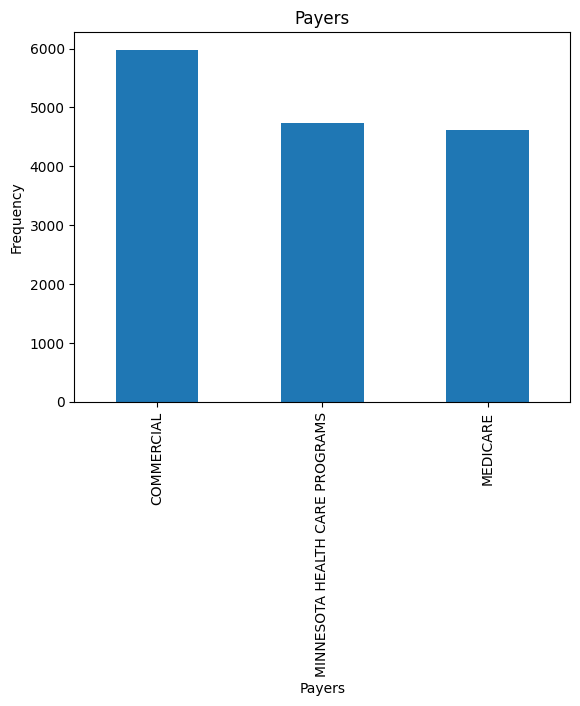

In [31]:
payers.plot(kind="bar")
plt.xlabel("Payers")
plt.ylabel("Frequency")
plt.title("Payers")
plt.show()

## Basic Explorations on Payers Dataset

In [35]:
payers = pd.read_csv(r"C:\Users\luyil\ihealth\datasets\preproc\services\payers.csv")
payers.head()

,Unnamed: 0.1,Unnamed: 0,payer,insurer_paid_amt_mean,insurer_paid_amt_sum,member_paid_amt_mean,member_paid_amt_sum,total_paid_amt_mean,total_paid_amt_sum,row_id,...,unique_member_cnt,svc_code,svc_code_type,svc_code_ctg,svc_code_ctg_desc,clm_cnt,member_months,total_paid_amt_median,insurer_paid_amt_median,member_paid_amt_median
0,15330,0,MEDICARE,0.00,0.00,0.00,0.00,0.00,0.00,3127575.0,...,15.0,G8482,CPT/HCPCS,999.0,HCPCS Level II codes not classified,21.0,180.0,0.00,0.00,0.00
1,15331,1,COMMERCIAL,258.94,3366.29,71.67,931.73,330.61,4298.02,2888025.0,...,13.0,76705,CPT/HCPCS,196.0,Ultrasound - Abdomen/retroperitoneum - Diagnostic,24.0,137.0,328.00,284.33,43.26
2,15332,2,MINNESOTA HEALTH CARE PROGRAMS,225.33,28392.81,0.00,0.00,225.33,28392.81,2878775.0,...,126.0,A0425,CPT/HCPCS,239.0,"Transportation - Patient, provider, equipment",205.0,1321.0,81.83,81.83,0.00
3,15333,3,COMMERCIAL,1311.12,14422.37,32.76,360.45,1343.89,14782.82,3142946.0,...,11.0,C8929,CPT/HCPCS,193.0,Ultrasound - Heart (echocardiogram) - Diagnostic,11.0,132.0,1681.67,1674.97,0.00
4,15334,4,MEDICARE,2922.00,46752.03,1102.31,17637.01,4024.31,64389.04,3127585.0,...,16.0,J0690,CPT/HCPCS,240.0,"Medications (injections, infusions, other forms)",22.0,192.0,0.00,0.00,0.00


In [36]:
payers.dtypes

Unnamed: 0.1                 int64
Unnamed: 0                   int64
payer                       object
insurer_paid_amt_mean      float64
insurer_paid_amt_sum       float64
member_paid_amt_mean       float64
member_paid_amt_sum        float64
total_paid_amt_mean        float64
total_paid_amt_sum         float64
row_id                     float64
service_year               float64
county_code                float64
county_name                 object
age_group_code             float64
age_group_name              object
sex                         object
unique_member_cnt          float64
svc_code                    object
svc_code_type               object
svc_code_ctg               float64
svc_code_ctg_desc           object
clm_cnt                    float64
member_months              float64
total_paid_amt_median      float64
insurer_paid_amt_median    float64
member_paid_amt_median     float64
dtype: object

In [37]:
obj_columns = ["payer","county_name","age_group_name","sex","svc_code_type","svc_code","svc_code_ctg_desc"]
qual_data = payers[obj_columns]
qual_data.shape

(6872085, 7)

In [38]:
qual_data.head()

,payer,county_name,age_group_name,sex,svc_code_type,svc_code,svc_code_ctg_desc
0,MEDICARE,Chippewa,75 years and older,M,CPT/HCPCS,G8482,HCPCS Level II codes not classified
1,COMMERCIAL,Benton,18 years and under,M,CPT/HCPCS,76705,Ultrasound - Abdomen/retroperitoneum - Diagnostic
2,MINNESOTA HEALTH CARE PROGRAMS,Beltrami,19 to 44 years,M,CPT/HCPCS,A0425,"Transportation - Patient, provider, equipment"
3,COMMERCIAL,Chisago,45 to 64 years,F,CPT/HCPCS,C8929,Ultrasound - Heart (echocardiogram) - Diagnostic
4,MEDICARE,Chippewa,75 years and older,M,CPT/HCPCS,J0690,"Medications (injections, infusions, other forms)"


In [40]:
quant_data = payers.drop(obj_columns,axis=1)
quant_data.shape

(6872085, 19)

In [41]:
quant_data.head()

,Unnamed: 0.1,Unnamed: 0,insurer_paid_amt_mean,insurer_paid_amt_sum,member_paid_amt_mean,member_paid_amt_sum,total_paid_amt_mean,total_paid_amt_sum,row_id,service_year,county_code,age_group_code,unique_member_cnt,svc_code_ctg,clm_cnt,member_months,total_paid_amt_median,insurer_paid_amt_median,member_paid_amt_median
0,15330,0,0.00,0.00,0.00,0.00,0.00,0.00,3127575.0,2010.0,23.0,5.0,15.0,999.0,21.0,180.0,0.00,0.00,0.00
1,15331,1,258.94,3366.29,71.67,931.73,330.61,4298.02,2888025.0,2010.0,9.0,1.0,13.0,196.0,24.0,137.0,328.00,284.33,43.26
2,15332,2,225.33,28392.81,0.00,0.00,225.33,28392.81,2878775.0,2010.0,7.0,2.0,126.0,239.0,205.0,1321.0,81.83,81.83,0.00
3,15333,3,1311.12,14422.37,32.76,360.45,1343.89,14782.82,3142946.0,2010.0,25.0,3.0,11.0,193.0,11.0,132.0,1681.67,1674.97,0.00
4,15334,4,2922.00,46752.03,1102.31,17637.01,4024.31,64389.04,3127585.0,2010.0,23.0,5.0,16.0,240.0,22.0,192.0,0.00,0.00,0.00


In [42]:
quant_data = quant_data.drop(["Unnamed: 0.1","Unnamed: 0"],axis=1)
quant_data.shape

(6872085, 17)

### Quantitative Data Analysis
#### Correlation Analysis

In [43]:
corr_mat = quant_data.corr().round(2)
corr_mat

,insurer_paid_amt_mean,insurer_paid_amt_sum,member_paid_amt_mean,member_paid_amt_sum,total_paid_amt_mean,total_paid_amt_sum,row_id,service_year,county_code,age_group_code,unique_member_cnt,svc_code_ctg,clm_cnt,member_months,total_paid_amt_median,insurer_paid_amt_median,member_paid_amt_median
insurer_paid_amt_mean,1.00,0.34,0.33,0.07,1.00,0.33,0.01,0.01,-0.00,-0.01,-0.01,0.10,0.13,-0.01,0.94,0.94,0.26
insurer_paid_amt_sum,0.34,1.00,0.14,0.54,0.34,1.00,0.01,0.01,-0.01,-0.00,0.20,0.07,0.52,0.20,0.32,0.32,0.14
member_paid_amt_mean,0.33,0.14,1.00,0.20,0.37,0.15,0.00,0.00,0.00,0.02,-0.01,0.08,0.00,-0.01,0.32,0.28,0.78
member_paid_amt_sum,0.07,0.54,0.20,1.00,0.08,0.60,-0.00,-0.00,-0.00,0.01,0.43,0.04,0.23,0.44,0.07,0.06,0.17
total_paid_amt_mean,1.00,0.34,0.37,0.08,1.00,0.33,0.01,0.01,-0.00,-0.01,-0.01,0.11,0.12,-0.01,0.94,0.94,0.29
total_paid_amt_sum,0.33,1.00,0.15,0.60,0.33,1.00,0.00,0.01,-0.01,-0.00,0.23,0.07,0.52,0.23,0.31,0.31,0.15
row_id,0.01,0.01,0.00,-0.00,0.01,0.00,1.00,1.00,0.08,0.04,-0.01,-0.03,0.01,-0.01,0.01,0.01,0.00
service_year,0.01,0.01,0.00,-0.00,0.01,0.01,1.00,1.00,-0.00,0.04,-0.00,-0.03,0.01,-0.00,0.01,0.01,0.00
county_code,-0.00,-0.01,0.00,-0.00,-0.00,-0.01,0.08,-0.00,1.00,-0.00,-0.01,0.00,-0.01,-0.01,-0.00,-0.00,0.00
age_group_code,-0.01,-0.00,0.02,0.01,-0.01,-0.00,0.04,0.04,-0.00,1.00,-0.02,0.03,-0.00,-0.01,-0.01,-0.01,0.03


<Axes: >

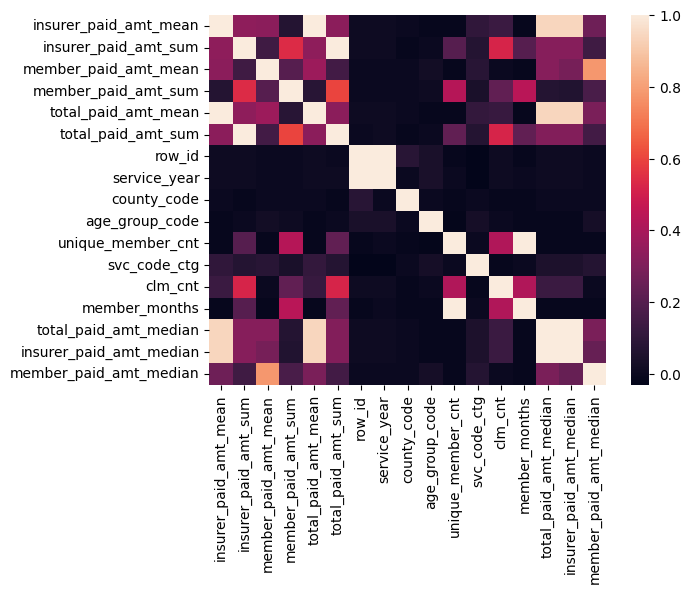

In [44]:
sns.heatmap(corr_mat)

### Qualititive Data Analysis